Some references: https://machinelearningmastery.com/binary-classification-tutorial-with-the-keras-deep-learning-library/, https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout, https://pbpython.com/categorical-encoding.html, https://www.sharpsightlabs.com/blog/pandas-get-dummies/, https://dataindependent.com/pandas/pandas-get-dummies-pd-get_dummies/#:~:text=In%20this%20case%2C%20you%20need,columns%20of%200s%20and%201s)., https://machinelearningmastery.com/binary-classification-tutorial-with-the-keras-deep-learning-library/, MLNN Lecture 11 code , https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction?select=heart.csv Data Source


In [16]:
pip install tensorflow

### Data preparation and visualization

In [17]:
import numpy as np
from sklearn.model_selection import train_test_split

In [18]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

heart = pd.read_csv('heart.csv')

heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [19]:
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [20]:
heart.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [21]:
heart = heart.rename(columns=str.lower)
heart.columns

Index(['age', 'sex', 'chestpaintype', 'restingbp', 'cholesterol', 'fastingbs',
       'restingecg', 'maxhr', 'exerciseangina', 'oldpeak', 'st_slope',
       'heartdisease'],
      dtype='object')

In [22]:
#numerical_features = [col for col in heart.columns] #List comprehension!
numerical_features = ['age', 'restingbp', 'cholesterol', 'oldpeak', 'maxhr']
binary_features = ['sex', 'fastingbs','exerciseangina']
categorical_features = ['chestpaintype','st_slope', 'restingecg']

In [23]:
X = heart.drop(['heartdisease'], axis=1)
y = heart.heartdisease

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

In [24]:
def desc_num_feature(feature_name, bins=30, edgecolor='k', **kwargs):
  fig, ax = plt.subplots(figsize=(8,4))
  X_train[feature_name].hist(bins=bins, edgecolor=edgecolor, ax=ax, **kwargs)
  ax.set_title(feature_name, size=15)
  plt.figtext(1,0.15, X_train[feature_name].describe().round(2).to_string,size=15)


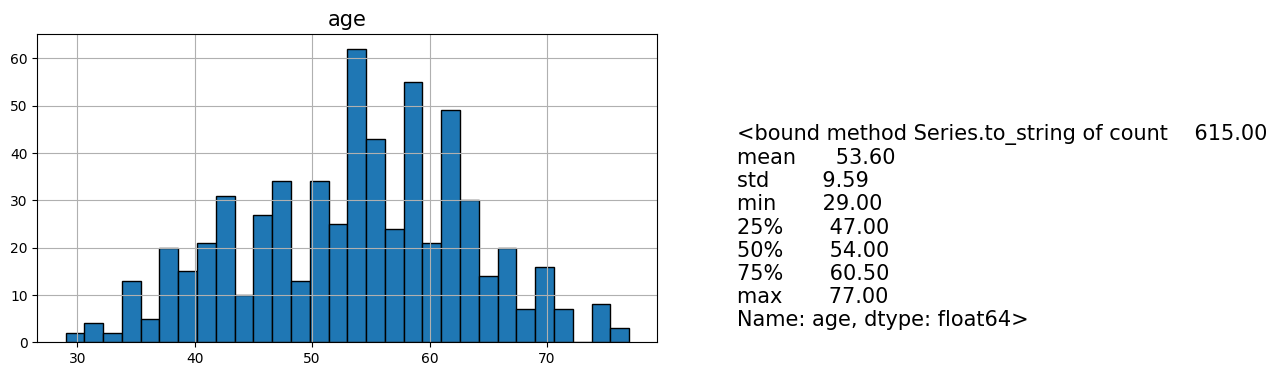

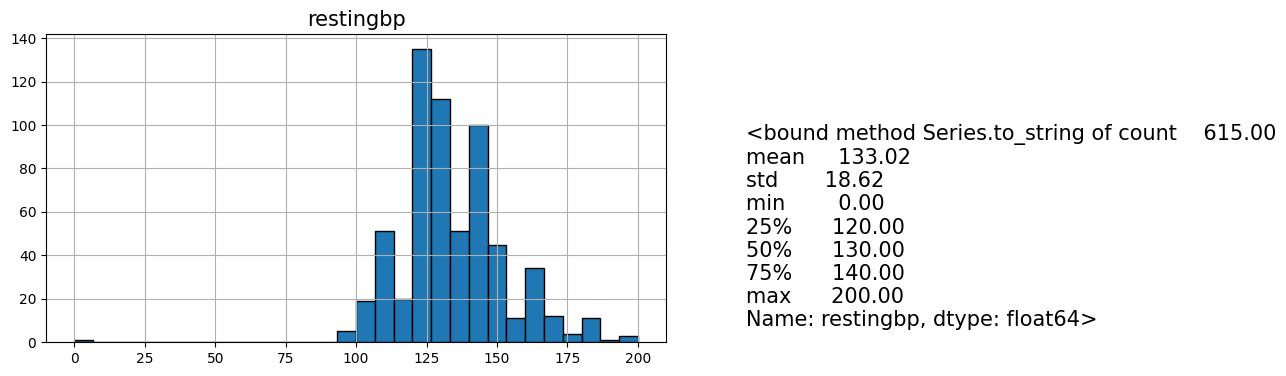

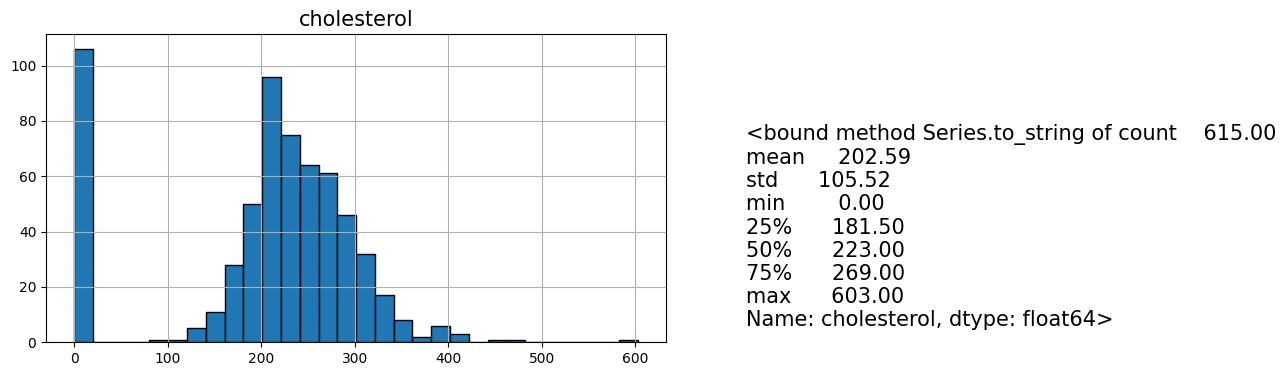

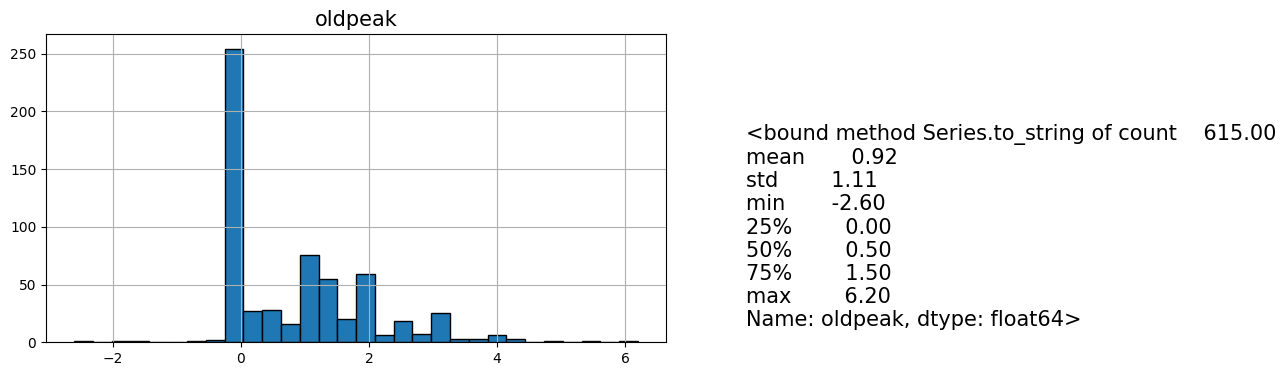

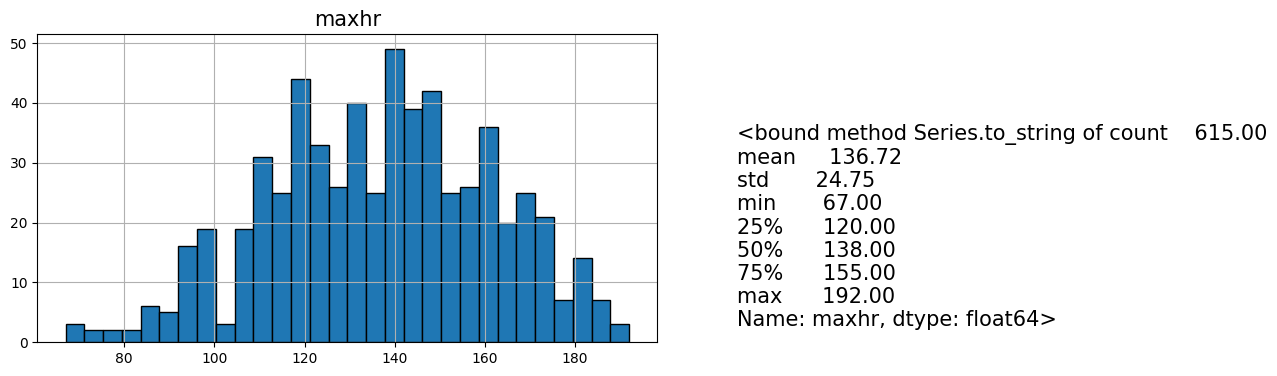

In [25]:
for x in numerical_features:
  desc_num_feature(x)

In [26]:
def desc_binary_feature(feature_name, bins=30, edgecolor='k', **kwargs):
  fig, ax = plt.subplots(figsize=(8,4))
  X_train[feature_name].plot.hist()
  ax.set_title(feature_name, size=15)
  plt.figtext(1,0.15, X_train[feature_name].describe().round(2).to_string,size=15)

In [27]:
heart['sex'].value_counts()

M    725
F    193
Name: sex, dtype: int64

In [28]:
heart["sex"] = np.where(heart["sex"].str.contains("M"), 1, 0)
heart['sex'].value_counts()

1    725
0    193
Name: sex, dtype: int64

In [29]:
heart['fastingbs'].value_counts()

0    704
1    214
Name: fastingbs, dtype: int64

In [30]:
heart['exerciseangina'].value_counts()

N    547
Y    371
Name: exerciseangina, dtype: int64

In [31]:
heart['exerciseangina'] = np.where(heart["exerciseangina"].str.contains("Y"),1,0)

In [32]:
heart['exerciseangina'].value_counts()

0    547
1    371
Name: exerciseangina, dtype: int64

TypeError: no numeric data to plot

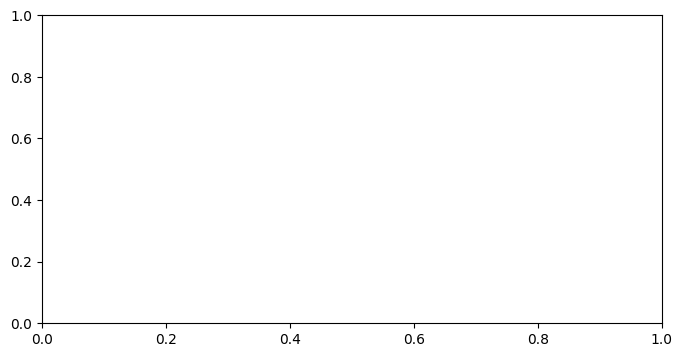

In [34]:
for x in binary_features:
  desc_binary_feature(x)

In [ ]:
import seaborn as sns

In [ ]:
#colors = ['blue', 'orange']
def desc_target_feature(feature_name, bins=30, edgecolor='k', **kwargs):
  fig, ax = plt.subplots(figsize=(8,4))
  sns.histplot(data=training_data, x=feature_name, hue='heartdisease')
  #X_train[feature_name].hist(bins=bins, edgecolor=edgecolor, ax=ax, **kwargs)
  ax.set_title(feature_name, size=15)
  plt.figtext(1,0.15, training_data[feature_name].describe().round(2).to_string,size=15)
  fig.suptitle('')

In [ ]:
training_data = pd.concat([X, y], axis=1, join="inner")

In [ ]:
numerical_features

In [ ]:
#desc_features = ['age', 'restingbp', 'chol', 'thalach', 'oldpeak']
for x in numerical_features:
  desc_target_feature(x)

In [ ]:
categorical_features = ['chestpaintype','st_slope', 'restingecg']
training_data['chestpaintype'].value_counts()

In [ ]:
training_data = pd.get_dummies(training_data, columns=["chestpaintype"], drop_first=True)
training_data.head()


In [ ]:
training_data['st_slope'].value_counts()

In [ ]:
training_data = pd.get_dummies(training_data, columns=["st_slope"], drop_first=True)
training_data.head()


In [ ]:
training_data['restingecg'].value_counts()

In [ ]:
training_data = pd.get_dummies(training_data, columns=["restingecg"], drop_first=True)
training_data.head()


In [ ]:
categorical_features = ['chestpaintype','st_slope', 'restingecg']

In [ ]:
training_data.columns

In [ ]:
len(training_data.columns)

In [ ]:
training_data.columns[10:].to_list()

In [ ]:
categorical_features = [feature for feature in training_data.columns[10:].to_list()] #probably didn't need list comprehension here
categorical_features

### Using a neural network to predict heart disease

In [ ]:
X = training_data.drop(['heartdisease'], axis=1)
y = training_data.heartdisease

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(units=(X.shape[1]), activation=tf.nn.relu),
    keras.layers.Dense(1280, activation=tf.nn.relu),
    keras.layers.Dropout(.2),
    keras.layers.Dense(1280, activation=tf.nn.relu),
    keras.layers.Dropout(.2),
    keras.layers.Dense(1280, activation=tf.nn.relu),
    keras.layers.Dropout(.2),
    keras.layers.Dense(1280, activation=tf.nn.relu),
    keras.layers.Dense(1280, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

In [ ]:
model.summary()

Final test accuracy of 86.1%.

In [ ]:
test_loss, test_acc = model.evaluate(X_test,y_test)
print('test_accuracy:', test_acc)

### Making predictions with the model

In [ ]:
X_test[:1]

In [ ]:
model.predict([X_test[:1]])

In [ ]:
y_test[0:1]

In [ ]:
X_test[1:2]

In [ ]:
y_test[1:2]

In [ ]:
model.predict([X_test[1:2]])

In [ ]:
sns.histplot(data=training_data, x='age')

In [ ]:
sns.histplot(data=training_data.where(training_data['heartdisease']==1), x='age')

In [ ]:
sns.histplot(data=training_data.where(training_data['heartdisease']==0), x='age')